# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Load the dataset

In [2]:
data = pd.read_csv("C:\\Users\\kiran\\Desktop\\infosys Intern\\final_adjusted_crowd_dataset.csv")

# Display the first few rows of the dataset
print(data.head())

   Longitude   Latitude  Speed  Distance      Time     Acc X     Acc Y  \
0  73.822661  18.501627    0.0       0.0  18-45-12  0.046402 -0.137178   
1  73.822661  18.501627    0.0       0.0  18-45-12 -0.136978  0.365242   
2  73.822661  18.501627    0.0       0.0  18-45-13 -0.045355 -0.103340   
3  73.822661  18.501627    0.0       0.0  18-45-13  0.242089  0.072761   
4  73.822661  18.501627    0.0       0.0  18-45-13 -0.230234  0.011765   

      Acc Z  Heading    gyro_x    gyro_y    gyro_z  label  
0 -0.282934    352.0 -0.036306 -0.008226 -0.023416      0  
1  0.108889    352.0  0.035776 -0.009448  0.009570      0  
2 -0.534985    352.0 -0.011871 -0.027774  0.003462      0  
3 -0.350396    352.0 -0.017980  0.002769 -0.005091      0  
4 -0.494085    352.0  0.011342  0.003380  0.006516      0  


C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have va

   Contamination Rate  Number of Estimators  Number of Anomalies Detected
0                0.01                    50                           143
1                0.01                   100                           143
2                0.01                   200                           143
3                0.05                    50                           713
4                0.05                   100                           713
5                0.05                   200                           713
6                0.10                    50                          1425
7                0.10                   100                          1425
8                0.10                   200                          1425


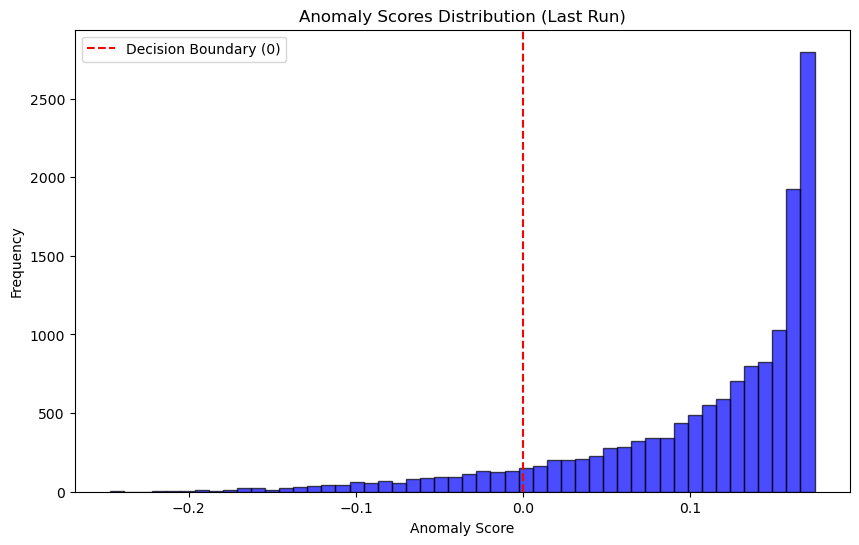

In [3]:
sensor_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
X = data[sensor_columns]

# Function to run Isolation Forest with different hyperparameters
def run_isolation_forest(X, contamination, n_estimators):
    model = IsolationForest(contamination=contamination, n_estimators=n_estimators, random_state=42)
    model.fit(X)
    anomalies = model.predict(X)
    return (anomalies, model.decision_function(X))

# Test different contamination rates and number of estimators
contamination_rates = [0.01, 0.05, 0.1]
n_estimators_list = [50, 100, 200]

# Store results for analysis
results = []

# Run Isolation Forest with different parameters
for contamination in contamination_rates:
    for n_estimators in n_estimators_list:
        anomalies, anomaly_scores = run_isolation_forest(X, contamination, n_estimators)
        num_anomalies = np.sum(anomalies == -1)
        results.append({
            'Contamination Rate': contamination,
            'Number of Estimators': n_estimators,
            'Number of Anomalies Detected': num_anomalies
        })

# Create a DataFrame to summarize the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Visualize anomaly scores for the last set of parameters used
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Anomaly Scores Distribution (Last Run)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Decision Boundary (0)')
plt.legend()
plt.show()